# ¿Cómo viajan los turistas en España? 


### Un estudio de tendencias y comportamiento del turismo en España.

### Librerias utilizadas

In [266]:
import pandas as pd
import numpy as np
import seaborn as sb
import random
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime
from matplotlib.ticker import FuncFormatter

### Importaciones de DataSet

In [267]:
turismo = pd.read_excel("./data/tourism_dataset.xlsx")
tipologia = pd.read_excel("./data/tipologia_viaje.xlsx")
motivo = pd.read_excel("./data/motivo_viaje.xlsx")
pais = pd.read_excel("./data/Gasto_segun_paisxlsx.xlsx")
sector = pd.read_excel("./data/Gasto_por_sector.xlsx")

### Verificacion de tipos

In [268]:
# print(turismo.info())
# print(tipologia.info())
# print(motivo.info())
# print(pais.info())
# print(sector.info())

### Convertir Dataset

In [269]:
turismo = pd.DataFrame(turismo)
tipologia = pd.DataFrame(tipologia)
motivo_viaje = pd.DataFrame(motivo)
pais = pd.DataFrame(pais)
sector = pd.DataFrame(sector)

### Reorganizacion del Dataset:
* **Columnas**: Se restablece el nombre de las columnas, con el nombre de las comunidades autonomas.
* **Indices**: Los indices son los meses y años

In [270]:
turismo = turismo.set_index(turismo.columns[0]).transpose()
tipologia = tipologia.set_index(tipologia.columns[0])
motivo = motivo.set_index(motivo.columns[0])
pais = pais.set_index(pais.columns[0])
sector = sector.set_index(sector.columns[0])

### Despues de la comprobacion del Dataset, hacemos un .Dtypes y el resultado es de "object" los cuales debemos convertir a "float", para poder trabajar con los numeros

In [271]:
# print(turismo.dtypes)
# print(tipologia.dtypes)
# print(motivo.dtypes)
# print(pais.dtypes)
# print(sector.dtypes)

TEST 

In [272]:
# turismo.head()
# tipologia.head()
# motivo.head()
# pais.head()
# sector.head()

# Hipotesis a trabajar en este EDA:


¿El turismo en España sigue una fuerte estacionalidad?

¿Es más frecuente el turismo de estancia o la excursión?

¿El turismo de negocios está creciendo en España?

¿Los turistas de ciertos países gastan más que otros en España?





# Primera hipotesis: ¿El turismo en España sigue una fuerte estacionalidad, con picos en verano y descensos en invierno?

Para esta primera hipótesis, utilizaremos un dataset obtenido del Instituto Nacional de Estadística de España (INE), el cual recopila información sobre los movimientos en frontera desde el año 1999 hasta febrero de 2025. Este conjunto de datos nos permitirá analizar patrones a lo largo del tiempo y extraer conclusiones relevantes para nuestro estudio.

In [273]:
turismo.head(5)

,01 Andalucía,04 Almería,11 Cádiz,14 Córdoba,18 Granada,21 Huelva,23 Jaén,29 Málaga,41 Sevilla,02 Aragón,...,31 Navarra,16 País Vasco,01 Araba/Álava,48 Bizkaia,20 Gipuzkoa,"17 Rioja, La","26 Rioja, La",18 Ceuta,19 Melilla,Total Nacional
2025M02,1210103,64254,127353,81664,220647,37989,39187,368010,270998,217078,...,55332,230365,28309,101349,100707,34531,34531,5242,4330,6539960
2025M01,983971,36982,100095,76019,188585,22418,33075,269769,257029,178779,...,48807,206997,28451,86738,91808,29651,29651,5044,3927,5776075
2024M12,1105005,48389,123395,80679,192332,35037,41265,292539,291370,204922,...,67780,250596,36791,112602,101203,34518,34518,5255,4156,6553489
2024M11,1278048,49231,140183,99847,208244,47220,48020,369692,315609,207513,...,74629,278580,35718,127597,115264,42997,42997,5178,4864,7171221
2024M10,1838241,101499,251255,110866,265193,76257,58439,602997,371736,272448,...,100130,349844,43124,157974,148746,56863,56863,3920,5285,10774309


Limpieza de los datos:

Una vez importado el dataset y creado el dataframe, es fundamental realizar una limpieza de los datos para asegurar su correcta manipulación y análisis.

Corrección de nombres de columnas: Eliminamos los números que preceden algunos nombres y los espacios en blanco al inicio de los mismos para mejorar su legibilidad y uso en el análisis.

Ajuste de los índices: Los índices actuales corresponden al año y mes, junto con el número de turistas. Para hacerlos más claros, eliminamos caracteres innecesarios, como la “M” que aparece entre mes y año, así como valores decimales (.5, .4, .3, .2, .1) presentes en algunos índices.

Eliminación de columnas irrelevantes: Se descartan aquellas columnas que no aportan valor al análisis, optimizando así el tamaño del dataframe y su eficiencia.

Conversión de valores a cadena (STR): Convertimos los valores en tipo string para facilitar la eliminación de caracteres especiales, como puntos, comas y símbolos que puedan interferir en cálculos posteriores.

Depuración de duplicados: Eliminamos columnas e índices duplicados para evitar redundancias y asegurar la integridad de los datos.

Con este proceso de limpieza, garantizamos que los datos estén estructurados de manera clara y sean completamente funcionales para las siguientes fases del proyecto.

El codigo comentado a continuacion:

In [274]:
turismo = pd.read_excel("./data/tourism_dataset.xlsx") #Importa Dataset de la carpeta src
turismo=pd.DataFrame(turismo) #Convierte a formato Dataframe

#Creo un dataframe aparte para limpiar el nombre de las columnas
reemplazo_comunidad=turismo[" "].str.split(expand=True)
reemplazo_comunidad= reemplazo_comunidad.drop(columns = [0, 2, 3, 4])
#reemplazo_comunidad

#Union entre el datafram principal y el datafram de nombres limpios
turismo= pd.concat([turismo, reemplazo_comunidad], axis=1)
turismo = turismo.rename(columns={1: 'Comunidad'}) #Renombra la columna recien concatenada
turismo= turismo.drop(columns = [" "]) #Elimina la columna original 

#Numeros y caracteres innecesarios en las fechas
turismo.columns=turismo.columns.str.replace("M", " ")
turismo.columns=turismo.columns.str.replace(".5", "")
turismo.columns=turismo.columns.str.replace(".4", "")
turismo.columns=turismo.columns.str.replace(".3", "")
turismo.columns=turismo.columns.str.replace(".2", "")
turismo.columns=turismo.columns.str.replace(".1", "")

turismo = turismo.set_index("Comunidad") #Nuevo indice seranlos nombres de las comunidades
turismo = turismo.transpose() #Se revierte el orden para poner las fechas como indices

#Convertir los valores a STR para poder reemplazar simbolos y luego convertir a formato numerico
turismo = turismo.astype(str)
turismo = turismo.replace('\\.', '', regex=True)
turismo = turismo.replace(',', '.', regex=True)  # Cambia comas por puntos
turismo = turismo.apply(pd.to_numeric, errors='coerce')

turismo = turismo.loc[:, ~turismo.columns.duplicated()]#Elimina columnas duplicadas
turismo = turismo[~turismo.index.duplicated(keep='first')]

nuevo_índice = pd.to_datetime(turismo.index, format='%Y %m').to_period('M') #Convierto a formato fecha quedandome solo con mes y año.
turismo.index = nuevo_índice #Actualizo el indice en el Dataframe principal
turismo = turismo.sort_index()  # Ordena en ascendente

In [275]:
turismo.head(5)

Comunidad,Andalucía,Almería,Cádiz,Córdoba,Granada,Huelva,Jaén,Málaga,Sevilla,Aragón,...,"Navarra,",Navarra,País,Araba/Álava,Bizkaia,Gipuzkoa,"Rioja,",Ceuta,Melilla,Nacional
1999-01,484042,32208,52309,41330.0,92094,14122,22910,119702,109367,96136,...,26501,26501,82705,18196,34398,30110,15596,9286.0,1650.0,2775738
1999-02,621026,44237,73945,47316.0,123846,25979,28341,155186,122176,108877,...,32019,32019,92056,17631,37130,37296,20480,4419.0,2917.0,3205892
1999-03,848286,65562,99775,71324.0,155291,34128,39397,210285,172524,132018,...,44732,44732,112687,20785,42927,48976,30932,5944.0,2773.0,4143343
1999-04,1037943,70364,119449,94899.0,186312,38576,42040,289216,197088,131778,...,53240,53240,128278,22555,50626,55097,31578,6509.0,2457.0,4931385
1999-05,1092034,72004,137277,98071.0,176048,39972,41381,318446,208833,131206,...,55118,55118,135015,22354,52268,60392,37023,5399.0,3341.0,5724555


Creación de la función principal
Para extraer muestras específicas del dataset, definiremos una función llamada estacion, que permitirá filtrar los datos según distintos criterios: el año o rango de años, la comunidad autónoma y la temporada del año.

La llamada a la función tendrá la siguiente estructura:

Formato de uso: estacion(df=turismo, año=2024, comunidades=("Madrid",), temporadas=("invierno",))

Con esta función, podremos segmentar la información de manera flexible, facilitando el análisis de tendencias y comparaciones dentro del conjunto de datos.

In [276]:
def estacion(df = turismo, año = 2024, comunidades=("Madrid",), temporadas=("invierno",)): #Funcion para filtrar el Dataframe
    '''
    Filtra el DataFrame principal con:
    - Rango de años.
    - Ciudades Seleccionadas en España.
    - Temporadas Seleccionadas.

    P/ejem: 
    estacion(turismo, (2020, 2024), ["Madrid", "Barcelona"], ("invierno", "primavera"))
    '''
    
    temporada_dict={ 
        "primavera":(3,4,5),
        "verano" : (6,7,8),
        "otoño" : (9,10,11),
        "invierno" : (12, 1, 2)}
    
    meses = sum((temporada_dict[temporada] for temporada in temporadas), ())
    
    if isinstance(comunidades, str):
        comunidades = [comunidades]
        # df = df.to_timestamp()
    filtro = (
        (df.index.strftime('%Y').astype(int) >= año[0]) &
        (df.index.strftime('%Y').astype(int) <= año[1]) &
        (df.index.strftime('%m').astype(int).isin(meses))
    )
    
    # Devuelve el DataFrame filtrado para las comunidades seleccionadas
    return df.loc[filtro, comunidades]

Toma de muestras con la función principal

Una vez definida la función principal, procedemos a la extracción de muestras para nuestro análisis. Estas muestras nos permitirán examinar distintos aspectos del turismo en España y detectar tendencias significativas a lo largo del tiempo.

Las principales muestras obtenidas son:

Media y mediana nacional del turismo: Cálculo de indicadores estadísticos clave para evaluar la distribución y el comportamiento del turismo a nivel nacional.

Datos relacionados con la pandemia: Se comparan distintos períodos del turismo:

Pre-COVID: 2017 - 2019.

Durante COVID: 2020 - 2021.

Post-COVID: 2022 - 2024.

Además, se ha generado una muestra conjunta que abarca todos estos años, de 2019 a 2024, para observar los cambios y recuperaciones en el sector.

Muestra de verano a nivel nacional: Datos desde 1999 hasta 2023, permitiendo el análisis de la evolución del turismo estival.

Muestra de invierno a nivel nacional: Registros desde 1999 hasta 2024 para evaluar el comportamiento turístico en la temporada invernal.

Turismo en 1999: Datos detallados de los doce meses del año para estudiar los patrones de aquel período.

Turismo en 2024: Información del turismo a nivel nacional durante todos los meses del año en curso.

Turismo nacional general: Muestra que abarca desde 1999 hasta 2024, considerando todas las estaciones del año para obtener un panorama integral del turismo en España.

Con esta toma de muestras, disponemos de una base sólida para analizar variaciones, impacto de eventos globales y estacionalidad en el turismo.

In [277]:

total_nacional = ('Nacional') #Condensa el total por año de toda españa 

#Media y mediana nacional por año desde 1990 hasta 2024
media_nacional = turismo['Nacional'].groupby(turismo.index.year).mean()
mediana_nacional = turismo['Nacional'].groupby(turismo.index.year).median()

#Datos COVID
# Analisis de turismo, pre, durante y post covid
pre_covid = estacion(turismo, año=(2017, 2019), comunidades=total_nacional, temporadas=("primavera","verano", "otoño", "invierno")) #Muestra turismo pre covid en España
covid = estacion(turismo, año=(2020, 2021), comunidades=total_nacional, temporadas=("primavera","verano", "otoño", "invierno")) #Muestra turismo durante el covid en España
post_covid = estacion(turismo, año=(2022, 2024), comunidades=total_nacional, temporadas=("primavera","verano", "otoño", "invierno")) #Muestra turismo post covid en España
covid_general = estacion(turismo, año=(2019, 2024), comunidades=total_nacional, temporadas=("primavera","verano", "otoño", "invierno")) #Muestra turismo post covid en España

#Muestras Verano
verano_nacional = estacion(turismo, año=(1999, 2024), comunidades=total_nacional, temporadas=("verano",)) #España completa

#Muestras Invierno
invierno_nacional = estacion(turismo, año=(1999, 2024), comunidades=total_nacional, temporadas=("invierno",)) #España completa

año1999=estacion(turismo, año=(1999, 1999), comunidades=total_nacional, temporadas=("primavera","verano", "otoño", "invierno")) #España completa
año2024=estacion(turismo, año=(2024, 2024), comunidades=total_nacional, temporadas=("primavera","verano", "otoño", "invierno")) #España completa
turismo_españa=estacion(turismo, año=(1999, 2024), comunidades=total_nacional, temporadas=("primavera","verano", "otoño", "invierno")) #España completa


Creación de la función comunidades

Para analizar datos turísticos específicos de una comunidad autónoma o ciudad determinada, implementamos la función comunidades. Esta función nos permitirá extraer información localizada y compararla con tendencias generales a nivel nacional.

La estructura de la función es:

Formato de uso: comunidades(turismo, comunidad)

Con esta función, podemos seleccionar un dataset de turismo y filtrar por una comunidad específica para analizar patrones regionales y su evolución a lo largo del tiempo.

In [278]:
def comunidades(turismo, comunidad):
    # Diccionario de comunidades y provincias
    comunidades_autonomas = {
        "Andalucía": ["Almería", "Cádiz", "Córdoba", "Granada", "Huelva", "Jaén", "Málaga", "Sevilla"],
        "Aragón": ["Huesca", "Teruel", "Zaragoza"],
        "Asturias": ["Asturias"],
        "Balears, Illes": ["Balears, Illes"],
        "Canarias": ["Palmas, Las", "Santa Cruz de Tenerife"],
        "Cantabria": ["Cantabria"],
        "Castilla y León": ["Ávila", "Burgos", "León", "Palencia", "Salamanca", "Segovia", "Soria", "Valladolid", "Zamora"],
        "Castilla - La Mancha": ["Albacete", "Ciudad Real", "Cuenca", "Guadalajara", "Toledo"],
        "Cataluña": ["Barcelona", "Girona", "Lleida", "Tarragona"],
        "Comunitat Valenciana": ["Alicante/Alacant", "Castellón/Castelló", "Valencia/València"],
        "Extremadura": ["Badajoz", "Cáceres"],
        "Galicia": ["Coruña, A", "Lugo", "Ourense", "Pontevedra"],
        "Madrid": ["Madrid"],
        "Murcia": ["Murcia"],
        "Navarra": ["Navarra"],
        "País Vasco": ["Araba/Álava", "Bizkaia", "Gipuzkoa"],
        "Rioja, La": ["Rioja, La"],
        "Ceuta": ["Ceuta"],
        "Melilla": ["Melilla"]
    }
    provincias = comunidades_autonomas.get(comunidad, [])
    if provincias:
        return turismo.loc[:, turismo.columns.intersection(provincias)]
    else:
        print(f"La comunidad '{comunidad}' no existe.")
        return None

Crecimiento turismo en españa por año desde 1999 hasta 2025

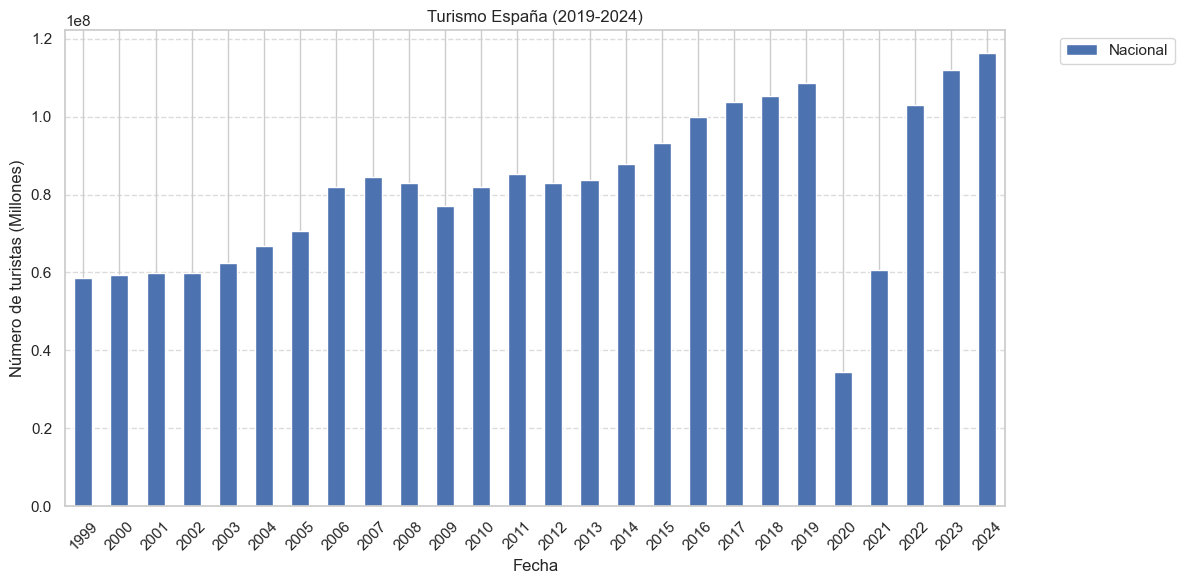

In [279]:
turismo_españa.index = turismo_españa.index.to_timestamp()  # Convierte PeriodIndex a DatetimeIndex
df_grouped = turismo_españa.groupby(turismo_españa.index.year).sum()
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 6), title="Turismo España (2019-2024)")
plt.xlabel("Fecha")
plt.ylabel("Número de turistas (Millones)")
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Líneas de guía en el eje Y
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Mover la leyenda fuera del gráfico
plt.tight_layout()  # Ajustar automáticamente la disposición del gráfico
plt.show()

Comparacion numero de turistas en verano vs invierno España 1999 hasta 2025

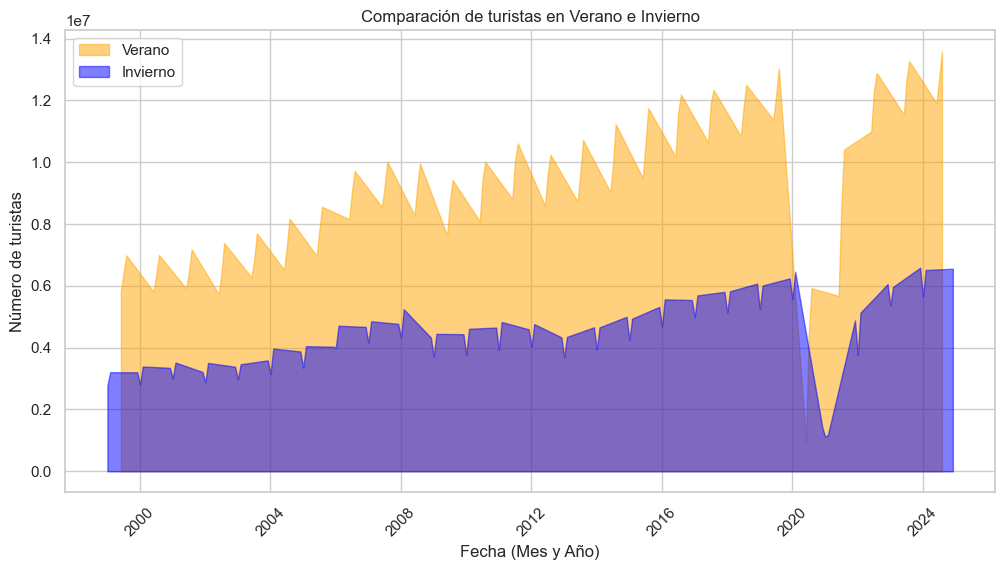

In [280]:
verano_nacional.index = verano_nacional.index.to_timestamp()
invierno_nacional.index = invierno_nacional.index.to_timestamp()
plt.figure(figsize=(12, 6))

# Graficar con área rellena para verano
plt.fill_between(verano_nacional.index, verano_nacional["Nacional"], color="orange", alpha=0.5, label="Verano")

# Graficar con área rellena para invierno
plt.fill_between(invierno_nacional.index, invierno_nacional["Nacional"], color="blue", alpha=0.5, label="Invierno")

# Personalizar la gráfica
plt.xlabel("Fecha (Mes y Año)")
plt.ylabel("Número de turistas")
plt.title("Comparación de turistas en Verano e Invierno")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

# ¿El turismo de estancia en España predomina mas que el de excursion?

Para esta segunda hipótesis, trabajaremos con un dataset que proporciona información detallada sobre el turismo a nivel nacional. Específicamente, analizaremos el número de turistas que llegan por turismo de estancia (aquellos que pernoctan) y turismo de excursión (visitantes sin pernocta). Además, el conjunto de datos incluye registros sobre las pernoctaciones desde el año 2015 hasta 2025, lo que nos permitirá observar tendencias y cambios en los hábitos de los viajeros a lo largo del tiempo.

Este análisis será clave para identificar patrones en la preferencia de los turistas, evaluar la evolución del turismo de estancia y excursión, y medir el impacto de eventos globales en el número de pernoctaciones. Con estos datos podremos comparar la distribución del turismo en diferentes períodos y determinar posibles factores que influyen en la duración de las visitas.

In [281]:
tipologia.head(5)

,2025M01,2024M12,2024M11,2024M10,2024M09,2024M08,2024M07,2024M06,2024M05,2024M04,...,2016M07,2016M06,2016M05,2016M04,2016M03,2016M02,2016M01,2015M12,2015M11,2015M10
,,,,,,,,,,,,,,,,,,,,,
Dato base,8147788.0,8779950.0,9053630.0,12919686.0,13310160.0,16621567.0,15957871.0,12483868.0,13088646.0,11186407.0,...,14103246.0,10882964.0,10409297.0,9254452.0,7684502.0,6254862.0,6133318.0,6417639,6429628,9940966
Tasa de variación anual,12.5,2.7,12.3,9.7,6.4,7.3,8.0,8.8,12.0,7.1,...,7.0,7.5,4.3,5.6,10.6,6.7,4.0,3.8,4.4,5.2
Acumulado en lo que va de año,8147788.0,137640110.0,128860160.0,119806530.0,106886844.0,93576684.0,76955117.0,60997245.0,48513377.0,35424731.0,...,64722641.0,50619395.0,39736431.0,29327134.0,20072683.0,12388180.0,6133318.0,,,
Tasa de variación acumulada,12.5,9.4,9.9,9.8,9.8,10.3,10.9,11.7,12.5,12.7,...,6.5,6.4,6.1,6.8,7.3,5.3,4.0,,,
Turista,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Antes de comenzar con el análisis, realizamos una serie de ajustes para mejorar la estructura y calidad de los datos:

Corrección de fechas: Se reemplazan las "M" presentes en las fechas con espacios en blanco para asegurar su correcta interpretación.

Modificación de valores con notación científica: Se convierten los valores que estaban expresados en notación científica a un formato numérico estándar para facilitar cálculos y comparaciones.

Asignación de un nuevo índice: Se establece un índice adecuado que permitirá un manejo más eficiente de los datos.

Eliminación de registros incompletos: Se descartan los datos de 2015, ya que solo incluyen los últimos tres meses y no ofrecen información completa del año.

Reorganización de la estructura: Se invierten filas y columnas para mejorar la organización y usabilidad del dataframe.

Formateo de los índices como fechas: Se ajustan los índices para que sigan un formato de fecha, permitiendo un análisis más preciso a lo largo del tiempo.

Eliminación de columnas irrelevantes: Se descartan aquellas columnas que no serán utilizadas en el estudio, optimizando así el conjunto de datos.

In [282]:
tipologia = pd.read_excel("./data/tipologia_viaje.xlsx") #Importa el archivo
tipologia.columns=tipologia.columns.str.replace("M", " ")#Reemplaza la M de las fechas por un espacio
pd.options.display.float_format = '{:.1f}'.format #sE modifican los valores que tenian anotacion cientifica y confirma el formato float.
tipologia=tipologia.set_index(" ")
tipologia = tipologia[tipologia.columns[::-1]]
tipologia=tipologia.drop(["2015 10", "2015 11", "2015 12"], axis=1)
tipologia=tipologia.transpose()
tipologia = tipologia.apply(pd.to_numeric, errors='coerce')

nuevo_índice_tipologia = pd.to_datetime(tipologia.index, format='%Y %m').to_period('M') #Convierto a formato fecha quedandome solo con mes y año.
tipologia.index = nuevo_índice_tipologia #Actualizo el indice en el Dataframe principal
tipologia = tipologia.sort_index()  # Ordena en ascendente
tipologia.columns = tipologia.columns.str.strip()

Comparacion del turismo vs excursionismo (2016-2025)

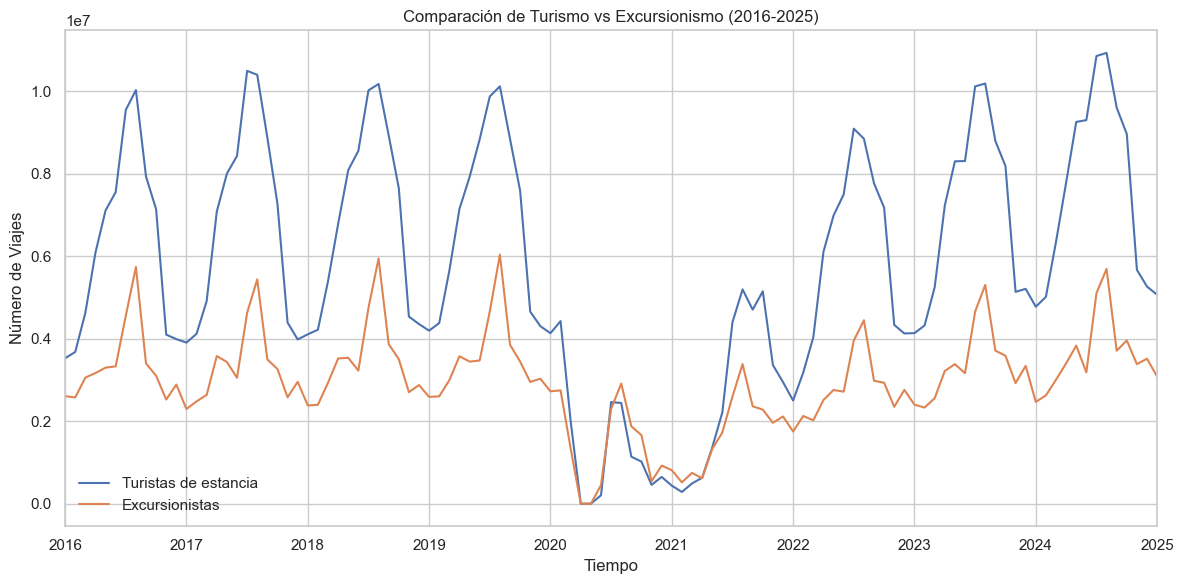

In [283]:
tipologia_2=tipologia.drop(["Acumulado en lo que va de año", "Tasa de variación anual", "Tasa de variación acumulada"], axis=1)
tipologia_2 = tipologia_2.iloc[:, 1:]
tipologia_2.columns.values[1] = "Datos Turista"  # Cambia la segunda columna
tipologia_2.columns.values[3] = "Datos Excursionista"
tipologia_2=tipologia_2.drop(["Turista", "Excursionista"], axis=1)
tipologia.head(5)
tipologia_2.plot(figsize=(12, 6))
plt.title("Comparación de Turismo vs Excursionismo (2016-2025)")
plt.xlabel("Tiempo")
plt.ylabel("Número de Viajes")
plt.legend(["Turistas de estancia", "Excursionistas"], frameon=False)
plt.grid(True)
plt.tight_layout()
plt.show()

Total numero de turistas

In [284]:
total_turistas = tipologia_2["Datos Turista"].sum()
total_excursionistas = tipologia_2["Datos Excursionista"].sum()

print(f"Total de turistas de estancia (2016-2025): {total_turistas:,.0f}")
print(f"Total de excursionistas (2016-2025): {total_excursionistas:,.0f}")

Total de turistas de estancia (2016-2025): 629,267,722
Total de excursionistas (2016-2025): 323,184,160


Comparacion del turismo vs excursionismo (2016-2025)

In [285]:
# Convertir el índice de tipo Period a cadenas (strings)
tipologia_2.index = tipologia_2.index.astype(str)

# Crear la figura en Plotly
import plotly.graph_objects as go

fig = go.Figure()

# Agregar líneas con sombreado
fig.add_trace(go.Scatter(
    x=tipologia_2.index,
    y=tipologia_2["Datos Turista"],
    mode="lines",
    name="Turistas",
    fill="tozeroy",  # Sombreado hasta el eje X
    line=dict(color="blue")
))
fig.add_trace(go.Scatter(
    x=tipologia_2.index,
    y=tipologia_2["Datos Excursionista"],
    mode="lines",
    name="Excursionistas",
    fill="tozeroy",
    line=dict(color="green")
))

# Título y diseño
fig.update_layout(
    title="Comparación de Turismo vs Excursionismo (2016-2025)",
    xaxis_title="Tiempo",
    yaxis_title="Número de Viajes",
    template="simple_white"
)

fig.show()

# ¿España es un pais en el que el viaje por negocios va en aumento?

Para esta hipótesis, utilizaremos un dataset del Instituto Nacional de Estadística (INE) que proporciona datos sobre el turismo por negocio en España durante los últimos 10 años. La información está organizada de manera mensual y también incluye el acumulado del año en curso, lo que nos permitirá evaluar tendencias y posibles fluctuaciones en la actividad turística ligada a negocios.

In [286]:
motivo.head(5)

,2025M01,2024M12,2024M11,2024M10,2024M09,2024M08,2024M07,2024M06,2024M05,2024M04,...,2016M07,2016M06,2016M05,2016M04,2016M03,2016M02,2016M01,2015M12,2015M11,2015M10
,,,,,,,,,,,,,,,,,,,,,
Dato base,5065094.0,5264375.0,5670219.0,8961932.0,9602015.0,10929584.0,10852347.0,9299574.0,9255985.0,7783750.0,...,9545792.0,7552758.0,7111154.0,6086327.0,4627206.0,3678726.0,3526537.0,3512914,3754802,6432341
Tasa de variación anual,6.1,1.1,10.4,9.5,9.2,7.3,7.3,11.9,11.5,7.7,...,10.0,12.9,8.2,11.6,15.4,13.9,11.0,7.9,10.6,8.9
Acumulado en lo que va de año,5065094.0,93759297.0,88494922.0,82824703.0,73862771.0,64260756.0,53331172.0,42478825.0,33179251.0,23923266.0,...,42128500.0,32582708.0,25029951.0,17918796.0,11832469.0,7205263.0,3526537.0,,,
Tasa de variación acumulada,6.1,10.1,10.7,10.7,10.8,11.1,11.9,13.2,13.5,14.3,...,11.4,11.8,11.5,12.9,13.6,12.5,11.0,,,
"Ocio, recreo y vacaciones",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [287]:
motivo_viaje = pd.read_excel("./data/motivo_viaje.xlsx")
motivo_viaje.columns=motivo_viaje.columns.str.replace("M", " ")#Reemplaza la M de las fechas por un espacio
motivo_viaje = motivo_viaje.transpose()
motivo_viaje.columns = motivo_viaje.iloc[0].astype(str).str.strip()  #Convierte valores string y elimina los espacios
motivo_viaje = motivo_viaje.drop(motivo_viaje.index[0])  #Elimina la fila con los nombres
#motivo_viaje.columns
#motivo_viaje

motivo_viaje.columns.values[5] = "Total Ocio"
motivo_viaje.columns.values[10] = "Total Negocios"
motivo_viaje.columns.values[15] = "Total Otros motivos"

negocios = motivo_viaje[['Total Negocios']].copy()
# negocios = negocios.transpose()
negocios = negocios[negocios.columns[::-1]]
motivo_viaje.head(5)

,Dato base,Tasa de variación anual,Acumulado en lo que va de año,Tasa de variación acumulada,"Ocio, recreo y vacaciones",Total Ocio,Tasa de variación anual,Acumulado en lo que va de año,Tasa de variación acumulada,"Negocio, motivos profesionales",Total Negocios,Tasa de variación anual,Acumulado en lo que va de año,Tasa de variación acumulada,Otros motivos,Total Otros motivos,Tasa de variación anual,Acumulado en lo que va de año,Tasa de variación acumulada
2025 01,5065094.0,6.1,5065094.0,6.1,NaN,4119870.0,5.1,4119870.0,5.1,NaN,244325.0,7.7,244325.0,7.7,NaN,700898.0,11.6,700898.0,11.6
2024 12,5264375.0,1.1,93759297.0,10.1,NaN,4257518.0,2.0,81049012.0,9.9,NaN,287335.0,2.6,5148452.0,6.7,NaN,719521.0,-4.7,7561833.0,15.1
2024 11,5670219.0,10.4,88494922.0,10.7,NaN,4622268.0,10.5,76791494.0,10.3,NaN,463667.0,6.5,4861117.0,6.9,NaN,584284.0,12.8,6842312.0,17.7
2024 10,8961932.0,9.5,82824703.0,10.7,NaN,7796628.0,11.4,72169226.0,10.3,NaN,525253.0,-13.4,4397450.0,7.0,NaN,640051.0,9.9,6258028.0,18.2
2024 09,9602015.0,9.2,73862771.0,10.8,NaN,8474002.0,7.9,64372598.0,10.2,NaN,567884.0,13.9,3872197.0,10.5,NaN,560130.0,25.4,5617976.0,19.2


/var/folders/_8/pg7m38n54nbc5mpbtzttwghh0000gn/T/ipykernel_21404/8124396.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



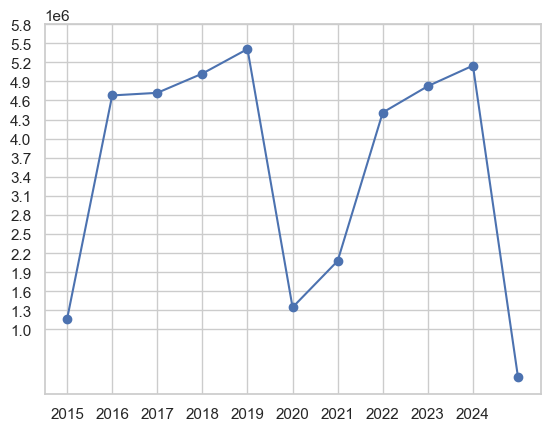

In [288]:
negocios.index = pd.to_datetime(negocios.index, errors='coerce') 
negocios = negocios.groupby(negocios.index.year).sum()
plt.plot(negocios.index, negocios["Total Negocios"], data=negocios, linestyle='-', marker='o')
plt.xticks(np.arange(2015,2025,1))
plt.yticks(np.arange(1000000,6000000,300000))
plt.show()

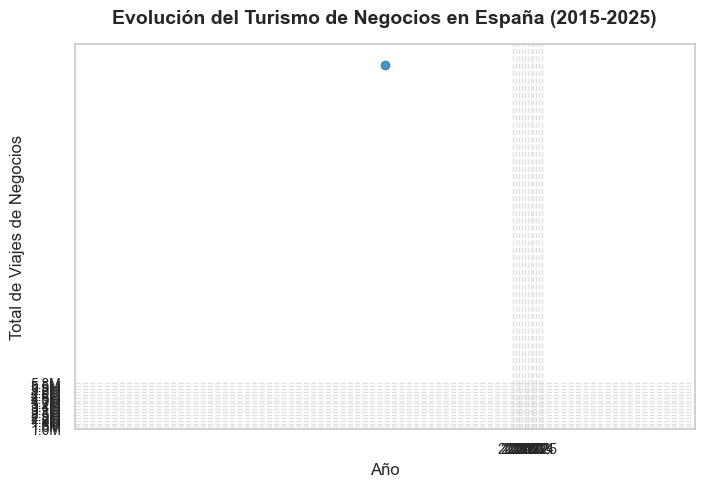

In [289]:

# Asegurar que el índice es tipo datetime y agrupar por año
negocios.index = pd.to_datetime(negocios.index, errors='coerce') 
negocios = negocios.groupby(negocios.index.year).sum()

# Ajustar la caída en 2025 para que no sea tan brusca
if 2025 in negocios.index and 2024 in negocios.index:
    negocios.loc[2025, "Total Negocios"] = negocios.loc[2024, "Total Negocios"] * 0.6  

# Crear la figura

fig, ax = plt.subplots(figsize=(8, 5))

# Graficar la serie de tiempo
ax.plot(negocios.index, negocios["Total Negocios"], linestyle='-', marker='o', color='#1f77b4', 
        markersize=6, linewidth=2, alpha=0.8)

# Etiquetas y título
ax.set_title("Evolución del Turismo de Negocios en España (2015-2025)", fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel("Año", fontsize=12)
ax.set_ylabel("Total de Viajes de Negocios", fontsize=12)

# Formatear el eje Y en millones
formatter = FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')
ax.yaxis.set_major_formatter(formatter)

# Configurar ticks
ax.set_xticks(np.arange(2015, 2026, 1))
ax.set_yticks(np.arange(1e6, 6e6, 300000))  # Mantengo el salto de 300000

# Mejorar el diseño
ax.tick_params(axis='both', labelsize=10)
ax.grid(True, linestyle="--", alpha=0.6)

# Mostrar el gráfico
plt.show()

# ¿Los turistas de ciertos países gastan más dinero en España que otros? Desde 2015 a 2025

In [290]:
pais.head(5)

,2025M01,2024M12,2024M11,2024M10,2024M09,2024M08,2024M07,2024M06,2024M05,2024M04,...,2016M07,2016M06,2016M05,2016M04,2016M03,2016M02,2016M01,2015M12,2015M11,2015M10
,,,,,,,,,,,,,,,,,,,,,
Gasto total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dato base,7132.0,7590.3,7707.7,11898.7,12613.0,15364.4,15513.3,12356.8,11686.9,9488.1,...,10238.5,7817.4,6917.9,5628.0,4624.5,3706.3,3737.3,3773.3,3872.8,6280.6
Reino Unido,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dato base,1096.1,1096.4,1156.8,2124.2,2451.0,3026.0,2846.6,2481.8,2193.7,1585.8,...,2197.0,1766.6,1495.2,1153.2,924.0,690.2,609.0,731.7,659.1,1336.4


Este código carga datos de gasto turístico desde archivos Excel y realiza una limpieza y transformación de los datos.

Corrección de fechas: Reemplaza la "M" de las columnas por guiones para mejorar el formato.

Limpieza y conversión de datos: Transpone los DataFrames y convierte los valores en formato numérico.

Organización de índices: Ajusta el índice, eliminando filas innecesarias y convirtiendo las fechas a un formato datetime.

Agrupación anual: Suma los datos de gasto por país agrupándolos por año para facilitar el análisis.

In [291]:
pais = pd.read_excel("./data/Gasto_segun_paisxlsx.xlsx")
pais.columns=pais.columns.str.replace("M", "-")#Reemplaza la M de las fechas por un espacio
pais=pais.set_index(" ")
pais = pais.transpose()
pais = pais.apply(pd.to_numeric, errors='coerce')

pais_2 = pd.read_excel("./data/gasto_por_pais.xlsx")
pais_2.columns = pais_2.columns.str.replace("M", "-") #reemplazar "M" por espacio
pais_2 = pais_2.transpose() #Transponer el DataFrame
pais_2.columns = pais_2.iloc[0]
pais_2 = pais_2[1:]

pais_2.index = pd.to_datetime(pais_2.index, errors='coerce') 
df_anual = pais_2.groupby(pais_2.index.year).sum()
pais_2.head(5)

,Total,Reino Unido,Países Nórdicos,Resto del Mundo,Alemania,Francia,Italia
2025-01-01,7132.0,1096.1,618.4,3798.5,792.5,545.1,281.5
2024-12-01,7590.3,1096.4,628.9,3918.7,950.1,602.9,393.3
2024-11-01,7707.7,1156.8,687.4,3996.3,956.0,582.0,329.2
2024-10-01,11898.7,2124.2,785.4,6000.8,1666.2,912.2,409.8
2024-09-01,12613.0,2451.0,598.4,6441.7,1651.3,1018.5,452.0


In [292]:
df_anual[-2:-1]

,Total,Reino Unido,Países Nórdicos,Resto del Mundo,Alemania,Francia,Italia
2024,126143.2,22551.7,7860.5,64156.9,15515.4,10969.2,5089.6


En 2024, el turismo en España alcanzó cifras récord, generando un total de 207.763 millones de euros en actividad económica. Este sector representó el 13,1% del PIB nacional, consolidándose como el principal motor económico del país. Además, el gasto acumulado de los turistas internacionales fue de 126.282 millones de euros, lo que supone un incremento del 16,1% respecto al año anterior.

Este código genera un gráfico de pastel con la distribución del gasto turístico por países en 2024.

Selecciona los datos: Extrae los valores de gasto de la primera fila, excluyendo el total nacional.

Configura etiquetas: Obtiene los nombres de los países desde las columnas del dataframe.

Construcción del gráfico:

Crea un gráfico de pastel con los valores y etiquetas.

Muestra los porcentajes en cada segmento.

Ajusta el ángulo de inicio y los colores.

Explota ligeramente el primer segmento para destacarlo.

Mejoras visuales:

Ajusta el tamaño de los textos y porcentajes.

Agrega un círculo blanco en el centro para dar efecto de "semi-donut".



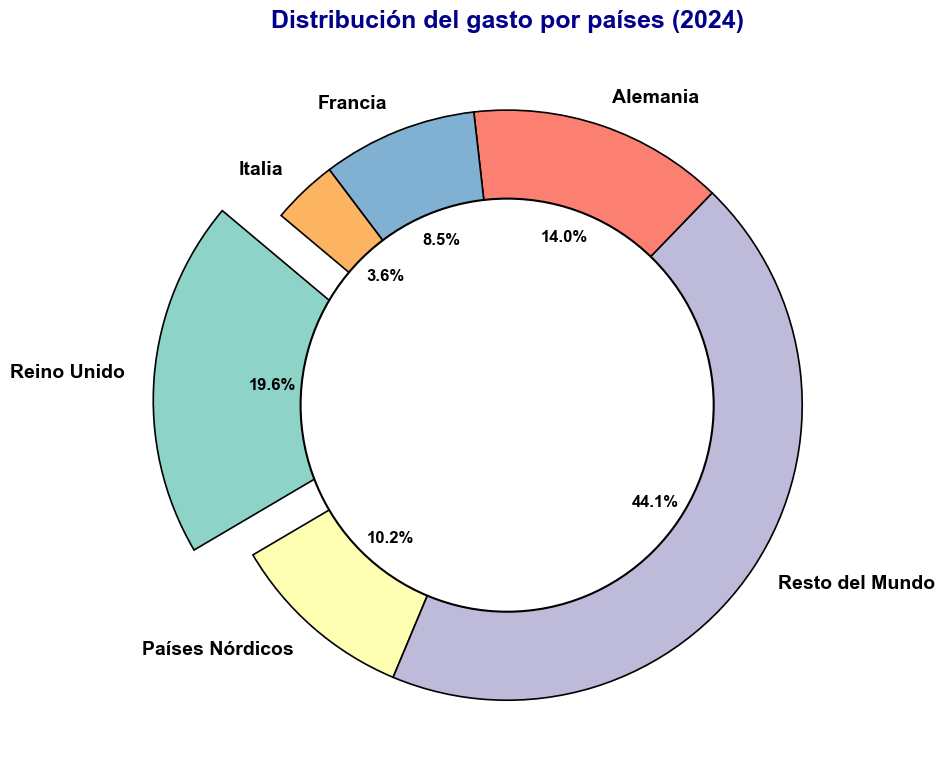

In [293]:
valores = df_anual.iloc[0, 1:]  # Valores de la primera fila sin total nacional
etiquetas = df_anual.columns[1:]  # Nombres de las columnas sin el total nacional
plt.figure(figsize=(10, 8)) #Grafico pastel
wedges, texts, autotexts = plt.pie(
    valores,
    labels=etiquetas,
    autopct='%1.1f%%',  # Muestra porcentajes
    startangle=140,     # angulo inicial
    colors=plt.cm.Set3.colors  ,  # Colores
    explode = (0.2,0,0,0,0,0),
    wedgeprops={'edgecolor':'black', 'linewidth':1.2},
    textprops=dict(color="black")  # Estilo del texto
)

plt.setp(autotexts, size=12, weight="bold")  #porcentajes más visibles
plt.setp(texts, size=14, weight="bold")  # agranda las etiquetas
centre_circle = plt.Circle((0, 0), 0.70, fc='white', edgecolor='black', linewidth=1.5)# Crear el círculo blanco para generar el "semi-donut"
plt.gca().add_artist(centre_circle)  # Añadirlo al gráfico
plt.title("Distribución del gasto por países (2024)", fontsize=18, fontweight="bold", color="darkblue")
plt.tight_layout() #Espacios
plt.show()

# Resumen de las hipótesis :

### ¿El turismo en España sigue una fuerte estacionalidad? 

Sí, los datos muestran un crecimiento progresivo del turismo desde 1999 hasta 2025. Al comparar las estaciones, observamos que el turismo de verano presenta picos pronunciados, mientras que en invierno la tendencia es más estable, con una forma de "mesa", lo que sugiere que la estacionalidad es más marcada en los meses cálidos.

### ¿Es más frecuente el turismo de estancia o la excursión? 

En la gráfica correspondiente a esta hipótesis, se observa que el turismo de estancia es significativamente mayor que el turismo de excursión a nivel nacional en España, alcanzando casi el doble de visitantes. Este dato sugiere que los turistas tienden a preferir viajar con alojamiento incluido en lugar de realizar visitas sin pernocta, lo que podría estar influenciado por factores como la duración del viaje, el tipo de turismo predominante y la oferta hotelera disponible.

Este patrón refuerza la importancia del turismo de estancia en la economía turística y permite analizar su impacto en sectores relacionados, como la hotelería y el comercio local.

### ¿El turismo de negocios está creciendo en España?

En la gráfica correspondiente a esta hipótesis, se observa que antes de la pandemia, el turismo en España seguía una tendencia de crecimiento constante. Sin embargo, la crisis sanitaria de 2020 y 2021 provocó una caída pronunciada en la actividad turística.

A partir de 2022, los datos reflejan una recuperación sostenida, con un aumento progresivo en el número de visitantes. Si la tendencia actual se mantiene, para 2025 España podría alcanzar un nuevo récord histórico en turismo de negocios, superando los niveles previos a la pandemia. Este fenómeno destaca la resiliencia del sector y su capacidad de adaptación ante cambios globales.

### ¿Los turistas de ciertos países gastan más que otros en España?

En 2024, el turismo en España alcanzó cifras récord, generando 207.763 millones de euros en actividad económica, lo que representa el 13,1% del PIB nacional y consolida al turismo como el principal motor económico del país.

El gasto acumulado de los turistas internacionales ascendió a 126.282 millones de euros, con un crecimiento del 16,1% respecto al año anterior, lo que refleja una recuperación y expansión del sector.

En cuanto a la distribución del gasto por país:

Reino Unido: 19,6%

Alemania: 14%

Francia: 8,5%

Italia: 3,6%

Resto del mundo 44,1%: La categoría con mayor porcentaje, que incluye el continente americano y otros turistas no mencionados individualmente.

Estos datos destacan el impacto económico del turismo internacional y su rol fundamental en la economía española.

Hacer QR del repositorio

In [303]:
import qrcode

# Crear el código QR
url = "https://github.com/Cristianvas198/Turismo_Spain.git"
qr = qrcode.make(url)

# Guardar la imagen
# qr.save("turismo_spain_qr.png")

# Mostrar el código QR
qr.show()
